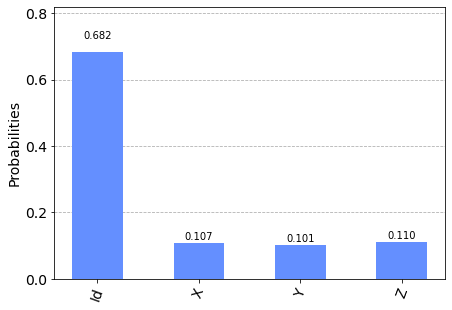

In [103]:
#task 3 V2 - New version according to Aritra's instructions (Discord 07/18/2021) 
from qiskit import *
from qiskit.tools.visualization import plot_histogram
%matplotlib inline
import random
import numpy as np
from collections import Counter

def QP(n,circuits,probs,trails):
    cont = {}   
    stats_circ = {}
    stats_result = {}
    sum_probs = sum(probs)

    if int(sum_probs) < 1:
        circ_id = QuantumCircuit(n,n,name='Id')
        circ_id.i(range(n)) #does nothing
        circuits.append(circ_id)
        prob_circ_id = round(1 - sum_probs,3)
        probs.append(prob_circ_id)
        
    for i in range(len(circuits)):
        circuits[i].measure(range(n),range(n))
        
    order_numbers = np.arange(len(circuits))
    for i in range(trails):
        circ_order_num = np.random.choice(order_numbers, 1 , p = probs)
        sim = Aer.get_backend('qasm_simulator')
        result = execute(circuits[int(circ_order_num)],backend = sim).result()
        stats_result = Counter(stats_result) + Counter(result.get_counts())  
        cont = {circuits[int(circ_order_num)].name: 1}
        stats_circ = Counter(stats_circ) + Counter(cont)
    return stats_circ, stats_result


n = 1
c1 = QuantumCircuit(n,n,name='X')
c1.x(range(n))
c2 = QuantumCircuit(n,n,name='Y')
c2.y(range(n))
c3 = QuantumCircuit(n,n,name='Z')
c3.z(range(n))
circuits = [c1,c2,c3]

stats_circ, stats_result = QP(n,circuits,[0.1,0.1,0.1],1000)

plot_histogram(stats_circ)
 

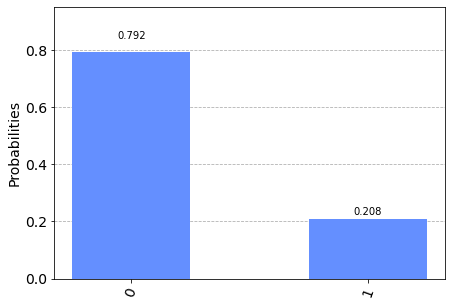

In [104]:
plot_histogram(stats_result)


